In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


In [2]:
#Load Dataset
df = pd.read_csv('/content/GOOG.csv')
data = df['Open'].values.reshape(-1, 1)


In [3]:
#Preprocessing
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

X_train = []
y_train = []

for i in range(60, len(data_scaled)):
    X_train.append(data_scaled[i-60:i])
    y_train.append(data_scaled[i])

X_train = np.array(X_train)
y_train = np.array(y_train)


In [4]:
#RNN Model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', return_sequences=False, input_shape=(60, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the Model
model.fit(X_train, y_train, epochs=5, batch_size=32)


Epoch 1/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0427
Epoch 2/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.9228e-04
Epoch 3/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.5346e-04
Epoch 4/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.9074e-04
Epoch 5/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 2.2628e-04


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


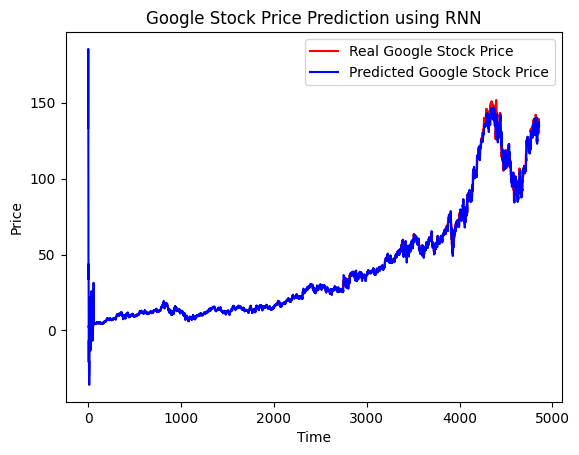

In [8]:
#Testing

# If test data is available
df_test = pd.read_csv('/content/GOOG.csv')
real_stock_price = df_test['Open'].values.reshape(-1, 1)
total_data = pd.concat((df['Open'], df_test['Open']), axis=0)
model_input = total_data[len(total_data)-len(df_test)-60:].values
model_input = model_input.reshape(-1, 1)
model_input = scaler.transform(model_input)

X_test = []
for i in range(60, len(model_input)):
    X_test.append(model_input[i-60:i])

X_test = np.array(X_test)
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)

# Plotting
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction using RNN')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
